<a href="https://colab.research.google.com/github/yujiayang1999/pima-analysis/blob/main/pima_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('diabetes.csv', delimiter=',')
# data = data.loc[~((data['Glucose'] == 0) | (data['BloodPressure'] == 0)|(data['SkinThickness'] == 0) | (data['BMI'] == 0))]
# data.replace(0,data.mean(axis=0),inplace=True)
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]] = data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,data.mean(axis=0))
print(data.shape)
print(data.describe().T)

(768, 9)
                          count        mean        std     min        25%  \
Pregnancies               768.0    4.400782   2.984162   1.000   2.000000   
Glucose                   768.0  121.681605  30.436016  44.000  99.750000   
BloodPressure             768.0   72.254807  12.115932  24.000  64.000000   
SkinThickness             768.0   26.606479   9.631241   7.000  20.536458   
Insulin                   768.0  118.660163  93.080358  14.000  79.799479   
BMI                       768.0   32.450805   6.875374  18.200  27.500000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078   0.243750   
Age                       768.0   33.240885  11.760232  21.000  24.000000   
Outcome                   768.0    0.348958   0.476951   0.000   0.000000   

                                 50%        75%     max  
Pregnancies                 3.845052    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPressure              72.000000   80.0000

In [ ]:

d = preprocessing.normalize(data, axis=0)
scaled_df = pd.DataFrame(d, columns = [data.columns])
scaled_df.head()
print(scaled_df.describe().T)
print(type(scaled_df.describe().T))

# norm_data = preprocessing.normalize(Insurance_Data, axis=0)
# norm_df = pd.DataFrame(norm_data,columns=[Insurance_Data.columns])

                          count      mean       std       min       25%  \
Pregnancies               768.0  0.029872  0.020256  0.006788  0.013576   
Glucose                   768.0  0.035007  0.008756  0.012659  0.028698   
BloodPressure             768.0  0.035588  0.005968  0.011821  0.031522   
SkinThickness             768.0  0.033932  0.012283  0.008927  0.026191   
Insulin                   768.0  0.028399  0.022277  0.003351  0.019098   
BMI                       768.0  0.035302  0.007479  0.019799  0.029916   
DiabetesPedigreeFunction  768.0  0.029538  0.020740  0.004883  0.015258   
Age                       768.0  0.034021  0.012036  0.021493  0.024563   
Outcome                   768.0  0.021316  0.029134  0.000000  0.000000   

                               50%       75%       max  
Pregnancies               0.026099  0.040727  0.115393  
Glucose                   0.033660  0.040349  0.057251  
BloodPressure             0.035463  0.039403  0.060090  
SkinThickness        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02bde4a550>]],
      dtype=object)

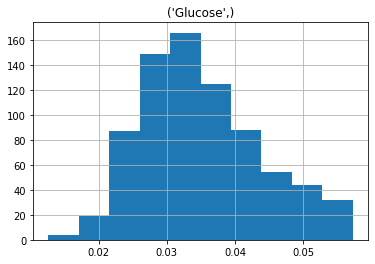

In [ ]:
scaled_df.hist(column="Glucose")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02bddae730>]],
      dtype=object)

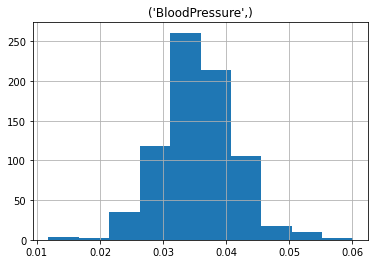

In [ ]:
scaled_df.hist(column="BloodPressure")

In [ ]:
X = scaled_df.iloc[:,0:8].to_numpy()
# dataset.iloc[:, 4]
print(X)
y = data.iloc[:,8].to_numpy()
print(y)


[[0.04072683 0.04257898 0.03546267 ... 0.03655192 0.03924821 0.05117289]
 [0.00678781 0.02445414 0.03250745 ... 0.02893694 0.02197149 0.03172719]
 [0.05430244 0.05264833 0.03152238 ... 0.02534702 0.04206507 0.03275065]
 ...
 [0.03393903 0.03481119 0.03546267 ... 0.0285018  0.01533622 0.03070373]
 [0.00678781 0.03624967 0.02955223 ... 0.03274443 0.02184629 0.04810252]
 [0.00678781 0.02675571 0.0344776  ... 0.03307079 0.019718   0.02353953]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=5)

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 76.54
8/8 [==============================] - 0s 2ms/step
[0.04072683370647543, 0.026468013734211867, 0.030537300807401756, 0.04081093651464417, 0.030155216874819788, 0.034811354622936566, 0.005320730020922629, 0.047079059916829195] => 0 (expected 0)
[0.03393902808872953, 0.037975845792564855, 0.039402968783744205, 0.02619100303991568, 0.019098179371178546, 0.029154509496709377, 0.011643009222254223, 0.07061858987524379] => 0 (expected 0)
[0.020363416853237715, 0.030495754954635412, 0.03546267190536978, 0.02619100303991568, 0.019098179371178546, 0.028066654664742608, 0.012957542521540988, 0.02763336125553018] => 0 (expected 0)
[0.027151222470983623, 0.02848188434442364, 0.033492523466182575, 0.048462987111139944, 0.019098179371178546, 0.03568163848850998, 0.009076539447456249, 0.03377410820120355] => 0 (expected 0)
[0.027151222470983623, 0.027618796940047166, 0.02758207814862094, 0.021680810023404714, 0.011727028784652139, 0.02262738050490877, 0.021282920083690517, 0.026609903

In [ ]:
testX = np.copy(x_test)
max = np.max(testX,axis=0)
print(max)

min = np.min(testX,axis=0)
print(min)

[0.1153927  0.05696377 0.05319401 0.08034653 0.17805938 0.06461858
 0.15148431 0.07061859]
[0.00678781 0.01639866 0.02364178 0.01020273 0.00335058 0.0209956
 0.00532073 0.02149261]


In [ ]:
# #pregnancies
# X_preg_max = np.copy(testX)
# for i in range(len(X)):
#     X_preg_max[i][0] = max[0]
# _, accuracy = model.evaluate(X_preg_max, y, verbose=0)
# print('Accuracy: %.2f' % (accuracy*100))
# predictions_preg_max = model.predict(X_preg_max) 

# # reshape = predictions_preg_max.reshape(1,-1)
# # print(reshape)
# for i in range(5):
# 	print('%s => %s (expected %d)' % (X_preg_max[i].tolist(), predictions_preg_max[i], y[i]))


In [ ]:
prediction_max = []
for j in range(8):
  X_max = np.copy(x_test)
  for i in range(len(x_test)):
    X_max[i][j] = max[j]
  _, accuracy = model.evaluate(X_max, y_test, verbose=0)
  predictions_sub_max = model.predict(X_max) 
  if len(prediction_max) == 0:
    prediction_max = predictions_sub_max
  else:
    prediction_max = np.concatenate((prediction_max, predictions_sub_max), axis=1)
print(prediction_max)


8/8 [==============================] - 0s 3ms/step
[[0.52112734 0.81557286 0.1949729  ... 0.5171948  0.6784007  0.31361628]
 [0.8267169  0.8571533  0.4963418  ... 0.85171336 0.8512611  0.49798003]
 [0.42717516 0.5903289  0.07593744 ... 0.41670984 0.38279286 0.26758665]
 ...
 [0.30499598 0.43994647 0.03584242 ... 0.34915033 0.17996897 0.1753038 ]
 [0.3485867  0.6858347  0.06072044 ... 0.3538951  0.33988082 0.23290926]
 [0.9119813  0.8477897  0.6618215  ... 0.8293598  0.8301535  0.8556064 ]]


In [ ]:
# min = X.min()
# #save a copy
# X_preg_min = testX
# for i in range(len(X)):
#     X_preg_min.iloc[i][1] = min[0]
# _, accuracy = model.evaluate(X_preg_min, y, verbose=0)
# predictions_preg_min = model.predict(X_preg_min) 
# for i in range(5):
# 	print('%s => %s (expected %d)' % (X_preg_min.iloc[i].tolist(), predictions_preg_min[i], y.iloc[i]))


In [ ]:
prediction_min = []
for j in range(8):
  X_min = np.copy(x_test)
  for i in range(len(x_test)):
    X_min[i][j] = min[j]
  _, accuracy = model.evaluate(X_min, y_test, verbose=0)
  predictions_sub_min = model.predict(X_min) 
  if len(prediction_min) == 0:
    prediction_min = predictions_sub_min
  else:
    prediction_min = np.concatenate((prediction_min, predictions_sub_min), axis=1)
print(prediction_min)


8/8 [==============================] - 0s 3ms/step
[[0.11052946 0.08605546 0.19718641 ... 0.10993484 0.19666824 0.11051492]
 [0.36573538 0.10817527 0.4998523  ... 0.39840636 0.45692262 0.18907095]
 [0.0659272  0.02096068 0.09438296 ... 0.05885329 0.07661069 0.07144266]
 ...
 [0.03987798 0.01210555 0.04502321 ... 0.03963381 0.02627542 0.03856894]
 [0.04820556 0.03206792 0.07577275 ... 0.0437514  0.05831723 0.05819518]
 [0.66589755 0.10007296 0.66766554 ... 0.35709584 0.42757824 0.6537194 ]]


In [ ]:
#pregreant difference
result = np.subtract(prediction_max, prediction_min)
print(result.shape)

(231, 8)


In [ ]:
# heatmap_diff = pd.DataFrame(result, columns = ['Column_A','Column_B','Column_C'])
heatmap_diff = pd.DataFrame(result, columns = [data.columns[0:8]])
print(heatmap_diff)
print(heatmap_diff.describe().T)


    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.410598  0.729517     -0.002214      0.028582  0.096819  0.407260   
1      0.460982  0.748978     -0.003511      0.032081  0.134977  0.453307   
2      0.361248  0.569368     -0.018446      0.040751  0.067715  0.357857   
3      0.404039  0.673984     -0.002168      0.039926  0.082281  0.348859   
4      0.264442  0.577556     -0.012521      0.038818  0.050816  0.367451   
..          ...       ...           ...           ...       ...       ...   
226    0.471468  0.760481     -0.037454      0.076112  0.147776  0.527458   
227    0.528606  0.773058     -0.055819      0.154256  0.165550  0.552430   
228    0.265118  0.427841     -0.009181      0.041245  0.033898  0.309517   
229    0.300381  0.653767     -0.015052      0.038219  0.059929  0.310144   
230    0.246084  0.747717     -0.005844      0.104229  0.112030  0.472264   

    DiabetesPedigreeFunction       Age  
0                   0.481732  0.20

In [ ]:
test_heat = heatmap_diff.iloc[0:5,:]
print(test_heat)

  Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0    0.410598  0.729517     -0.002214      0.028582  0.096819  0.407260   
1    0.460982  0.748978     -0.003511      0.032081  0.134977  0.453307   
2    0.361248  0.569368     -0.018446      0.040751  0.067715  0.357857   
3    0.404039  0.673984     -0.002168      0.039926  0.082281  0.348859   
4    0.264442  0.577556     -0.012521      0.038818  0.050816  0.367451   

  DiabetesPedigreeFunction       Age  
0                 0.481732  0.203101  
1                 0.394338  0.308909  
2                 0.306182  0.196144  
3                 0.445461  0.207618  
4                 0.242552  0.171492  


Text(58.5, 0.5, 'difference')

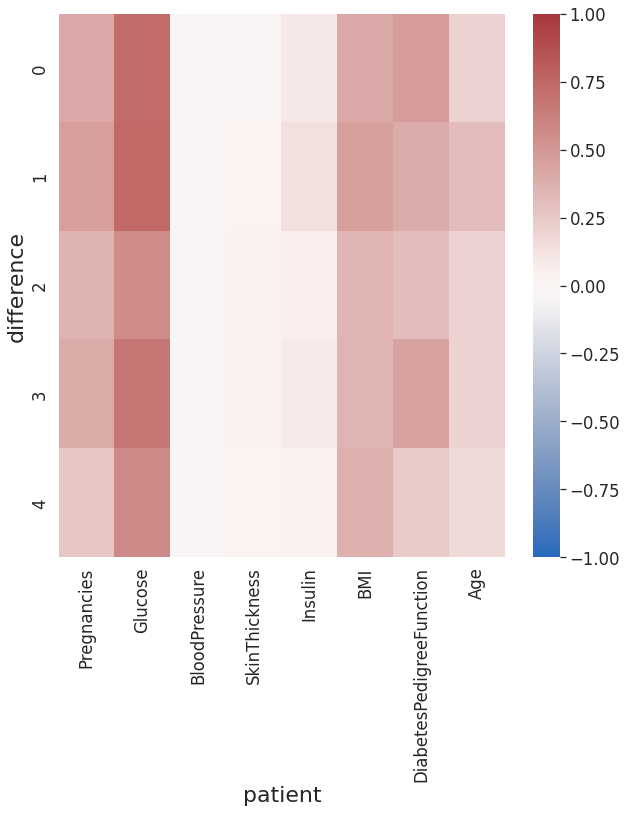

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
ax = sns.heatmap(test_heat,cmap = sns.color_palette("vlag", as_cmap=True),vmin=-1, vmax=1)

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)

Text(58.5, 0.5, 'difference')

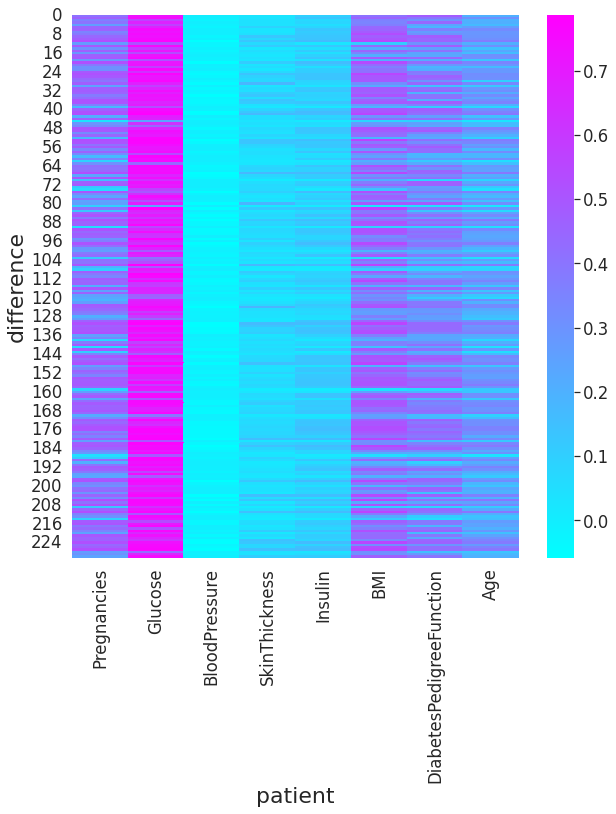

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True))
ax = sns.heatmap(heatmap_diff,cmap = 'cool')

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)

In [ ]:
import statsmodels.stats.api as sms
x_test_df = pd.DataFrame(x_test, columns = [data.columns[0:8]])
confid = x_test_df.apply(lambda x: sms.DescrStatsW(x).tconfint_mean())
confindence_interval= confid.to_numpy()
low_bd = confindence_interval[0]
high_bd = confindence_interval[1]


In [ ]:
print(low_bd)
print(high_bd)

[0.02815667 0.03412377 0.0354592  0.03187318 0.02432258 0.0339663
 0.02743483 0.03371798]
[0.03343144 0.0364496  0.03692008 0.03512155 0.03054805 0.03595773
 0.03338002 0.03696707]


In [ ]:
print(min)
print(max)

[0.00678781 0.01639866 0.02364178 0.01020273 0.00335058 0.0209956
 0.00532073 0.02149261]
[0.1153927  0.05696377 0.05319401 0.08034653 0.17805938 0.06461858
 0.15148431 0.07061859]


In [ ]:
prediction_high = []
for j in range(8):
  X_high = np.copy(x_test)
  for i in range(len(x_test)):
    X_high[i][j] = high_bd[j]
  _, accuracy = model.evaluate(X_high, y_test, verbose=0)
  predictions_sub_high = model.predict(X_high) 
  if len(prediction_high) == 0:
    prediction_high = predictions_sub_high
  else:
    prediction_high = np.concatenate((prediction_high, predictions_sub_high), axis=1)
print(prediction_high)


8/8 [==============================] - 0s 2ms/step
[[0.17465192 0.386974   0.19618955 ... 0.20579176 0.3337934  0.15771927]
 [0.49544474 0.46184617 0.49827498 ... 0.5814713  0.6359991  0.2827606 ]
 [0.11178681 0.15240273 0.08564406 ... 0.13097812 0.11914029 0.11511888]
 ...
 [0.06895518 0.0795867  0.04064939 ... 0.09046926 0.0416797  0.06352279]
 [0.082831   0.2226074  0.0686264  ... 0.09932199 0.09169991 0.09459765]
 [0.77241933 0.49009025 0.666264   ... 0.5703231  0.60803026 0.7399338 ]]


In [ ]:
prediction_low = []
for j in range(8):
  X_low = np.copy(x_test)
  for i in range(len(x_test)):
    X_low[i][j] = low_bd[j]
  _, accuracy = model.evaluate(X_low, y_test, verbose=0)
  predictions_sub_low = model.predict(X_low) 
  if len(prediction_low) == 0:
    prediction_low = predictions_sub_low
  else:
    prediction_low = np.concatenate((prediction_low, predictions_sub_low), axis=1)
print(prediction_low)


8/8 [==============================] - 0s 3ms/step
[[0.15997699 0.33609194 0.19629905 ... 0.19014065 0.3033686  0.14661214]
 [0.46913663 0.4076662  0.4984485  ... 0.5572973  0.59945714 0.26093912]
 [0.10091273 0.12281314 0.08656841 ... 0.11821684 0.10869453 0.10435253]
 ...
 [0.06195693 0.06308246 0.04110995 ... 0.08128559 0.03773446 0.0572696 ]
 [0.07453724 0.18231931 0.06938101 ... 0.08932793 0.08343213 0.08556495]
 [0.7533638  0.4280476  0.66641843 ... 0.54354775 0.57057637 0.7230212 ]]


In [ ]:
result_bd = np.subtract(prediction_high, prediction_low)
print(result_bd.shape)

(231, 8)


In [ ]:
heatmap_bd_diff = pd.DataFrame(result_bd, columns = [data.columns[0:8]])
print(heatmap_bd_diff)

    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.014675  0.050882     -0.000109      0.000932  0.003078  0.015651   
1      0.026308  0.054180     -0.000174      0.001486  0.004896  0.024174   
2      0.010874  0.029590     -0.000924      0.003032  0.001966  0.012761   
3      0.014259  0.041846     -0.000089      0.001592  0.002567  0.012379   
4      0.006975  0.027958     -0.000628      0.002285  0.001451  0.012130   
..          ...       ...           ...           ...       ...       ...   
226    0.028619  0.058447     -0.002906      0.001474  0.005994  0.028260   
227    0.024921  0.062419     -0.002774      0.008519  0.005683  0.024702   
228    0.006998  0.016504     -0.000461      0.001671  0.000953  0.009184   
229    0.008294  0.040288     -0.000755      0.002557  0.001727  0.009994   
230    0.019056  0.062043     -0.000154      0.008319  0.004695  0.026775   

    DiabetesPedigreeFunction       Age  
0                   0.030425  0.01

Text(58.5, 0.5, 'difference')

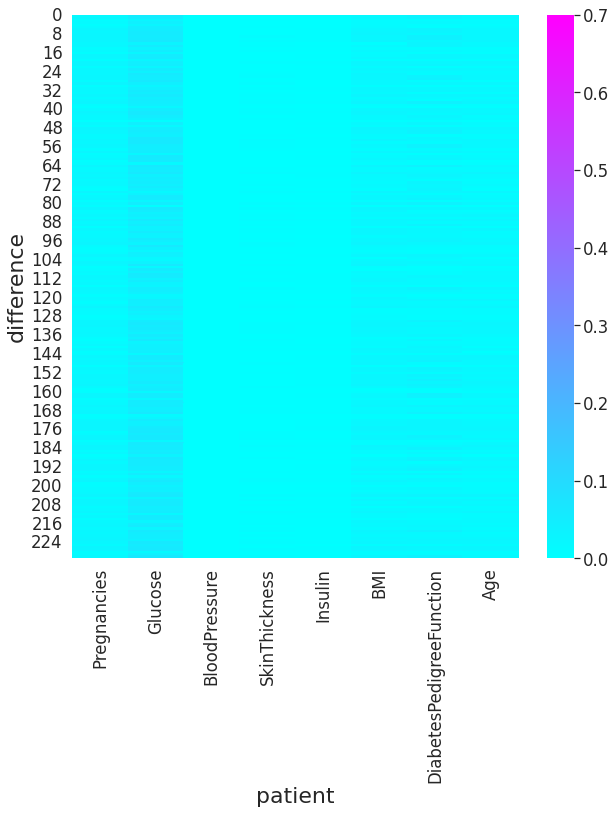

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_bd_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
# ax = sns.heatmap(heatmap_bd_diff,cmap = sns.color_palette("vlag", as_cmap=True))
ax = sns.heatmap(heatmap_bd_diff,cmap = 'cool',vmin=0, vmax=0.7)

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)